# Random Forest:loan 

In [33]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
loan=pd.read_csv('C:/Users/Hari/Desktop/place/excel worksheets/loan.csv',delimiter = ',', encoding =  'ISO-8859-1')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [39]:
loan.shape

(39717, 111)

In [41]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [42]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Treating Missing Values in Column

In [44]:
# Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [45]:
#columnwise Null count 
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [46]:
# Code for dropping the columns that have high null values and are not required for further analysis
loan= loan.loc[:,round(100*(loan.isnull().sum()/len(loan.index)),2) < 80]

In [47]:
# Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [48]:
loan=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
               'out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
               'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','application_type'], axis=1)

KeyError: "['next_pymnt_d'] not found in axis"

In [49]:
# Verifying Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

## Treating Missing Values in Row

In [50]:
# Removing the rows with the null values of the following column since we need to do analysis on them
loan = loan[~pd.isnull(loan['mths_since_last_delinq'])]
loan = loan[~pd.isnull(loan['emp_length'])]

In [51]:
# Verifying Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      3.70
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.24
purpose                        0.00
title                          0.02
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [52]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
16,1065775,1299699,10000,10000,10000.0,36 months,15.27%,347.98,C,C4,...,370.46,Apr-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
18,1062474,1294539,6000,6000,6000.0,36 months,11.71%,198.46,B,B3,...,16.98,Jul-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
27,1069657,1304764,5000,5000,5000.0,60 months,16.77%,123.65,D,D2,...,123.65,May-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [53]:
#columnwise Null count 
loan.isnull().sum(axis=0)

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                      506
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
desc                          4414
purpose                          0
title                            3
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
mths_since_last_deli

## Rectifying the values

In [54]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13690 non-null  int64  
 1   member_id                   13690 non-null  int64  
 2   loan_amnt                   13690 non-null  int64  
 3   funded_amnt                 13690 non-null  int64  
 4   funded_amnt_inv             13690 non-null  float64
 5   term                        13690 non-null  object 
 6   int_rate                    13690 non-null  object 
 7   installment                 13690 non-null  float64
 8   grade                       13690 non-null  object 
 9   sub_grade                   13690 non-null  object 
 10  emp_title                   13184 non-null  object 
 11  emp_length                  13690 non-null  object 
 12  home_ownership              13690 non-null  object 
 13  annual_inc                  136

In [55]:
#the 'int_rate' is converted from % to a numeric value
loan['int_rate'] = loan['int_rate'].str.replace('%', '')
loan['int_rate']=loan['int_rate'].astype(float)
loan['int_rate']=loan['int_rate'].apply(lambda x : x/100)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
16,1065775,1299699,10000,10000,10000.0,36 months,0.1527,347.98,C,C4,...,370.46,Apr-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
18,1062474,1294539,6000,6000,6000.0,36 months,0.1171,198.46,B,B3,...,16.98,Jul-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
27,1069657,1304764,5000,5000,5000.0,60 months,0.1677,123.65,D,D2,...,123.65,May-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [56]:
loan['term'] = loan['term'].apply(lambda x : x[:3])
loan['term']=loan['term'].astype(int)
loan['emp_length'] = loan['emp_length'].str.replace('years','')
loan['emp_length'] = loan['emp_length'].str.replace('year','')

import datetime
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

loan['emp_length']= loan['emp_length'].str.strip()
loan.loc[loan['emp_length']=='< 1','emp_length']=0
loan.loc[loan['emp_length']=='10+','emp_length']=10
loan['emp_length']=loan['emp_length'].astype(int)

loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,0.1269,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
16,1065775,1299699,10000,10000,10000.0,36,0.1527,347.98,C,C4,...,370.46,Apr-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
18,1062474,1294539,6000,6000,6000.0,36,0.1171,198.46,B,B3,...,16.98,Jul-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
27,1069657,1304764,5000,5000,5000.0,60,0.1677,123.65,D,D2,...,123.65,May-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,0.0807,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,0.1028,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,0.0807,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,0.0743,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# Exploratory Data Analysis

## Univariate Analysis


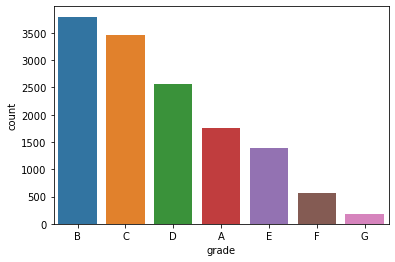

In [57]:
sns.countplot(loan['grade'],order = loan['grade'].value_counts().index)
plt.show()

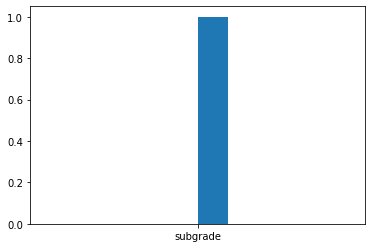

In [58]:
plt.hist('subgrade',data=loan)
plt.show()

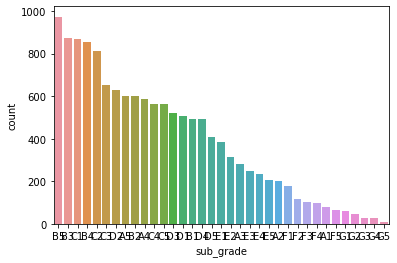

In [59]:
sns.countplot(loan['sub_grade'],order = loan['sub_grade'].value_counts().index)
plt.show()

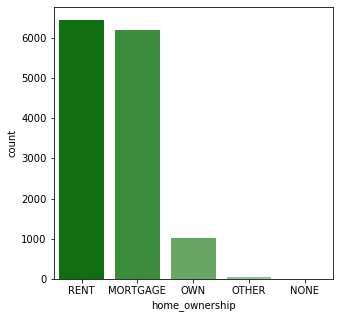

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(loan['home_ownership'],palette = sns.light_palette("green", reverse= True),order = loan['home_ownership'].value_counts().index)
plt.show()

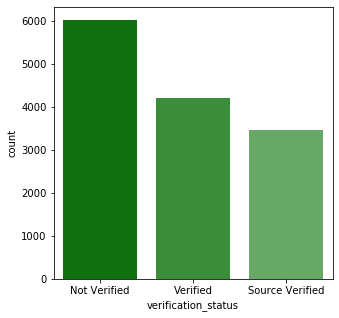

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(loan['verification_status'],palette = sns.light_palette("green", reverse= True),order = loan['verification_status'].value_counts().index)
plt.show()

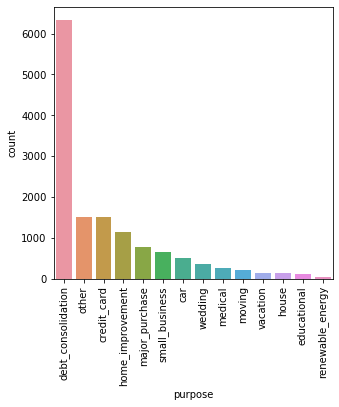

In [62]:
plt.figure(figsize=(5,5))
purpose = sns.countplot(loan['purpose'],order = loan['purpose'].value_counts().index)
purpose.tick_params(axis='x', rotation=90)
plt.show()


## Selected Data Understanding

In [63]:
loan['loan_amnt'].describe()

count    13690.000000
mean     10623.414901
std       7194.919321
min        500.000000
25%       5000.000000
50%       9000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

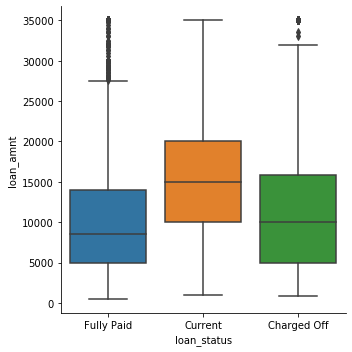

In [64]:
sns.catplot(y="loan_amnt", x="loan_status", kind="box", data=loan)
plt.show()

In [65]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,2060.0,11572.330097,7770.780091,900.0,5000.0,10000.0,15881.25,35000.0
Current,352.0,15806.463068,8492.250686,1000.0,10000.0,15000.0,20000.00,35000.0
Fully Paid,11278.0,10288.320181,6960.872469,500.0,5000.0,8500.0,14000.00,35000.0


In [66]:
loan['term'].describe()

count    13690.000000
mean        42.263842
std         10.540617
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [67]:
loan['term'].value_counts()

36    10117
60     3573
Name: term, dtype: int64

In [68]:
loan.groupby('term')['loan_status'].value_counts(normalize=True)

term  loan_status
36    Fully Paid     0.879905
      Charged Off    0.120095
60    Fully Paid     0.664987
      Charged Off    0.236496
      Current        0.098517
Name: loan_status, dtype: float64

In [69]:
#Calculation the percentage for terms only for the charged of loans
print('Charged Off')
print(loan.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])

print('Fully Paid')
print(loan.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid'])

Charged Off
term
36    0.120095
60    0.236496
Name: loan_status, dtype: float64
Fully Paid
term
36    0.879905
60    0.664987
Name: loan_status, dtype: float64


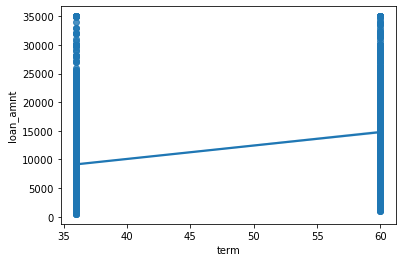

In [70]:
sns.regplot(x=loan["term"], y=loan["loan_amnt"])
plt.show()

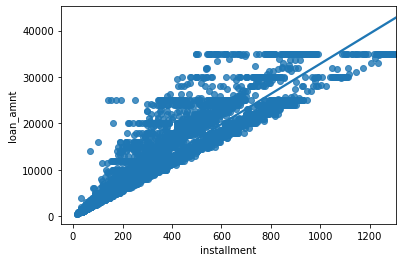

In [71]:
sns.regplot(x=loan["installment"], y=loan["loan_amnt"])
plt.show()

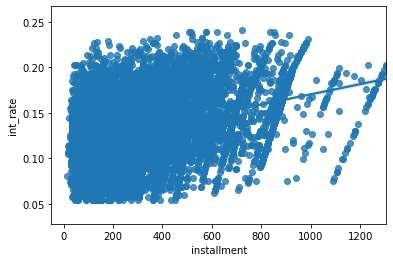

In [72]:
sns.regplot(x=loan["installment"], y=loan["int_rate"])
plt.show()

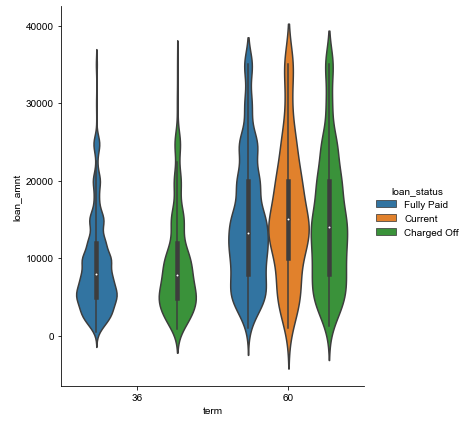

In [73]:
sns.catplot(x="term", y="loan_amnt", hue="loan_status",kind="violin", data=loan,height=6, aspect=.9)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

In [76]:
loan['grade'].unique()

array(['C', 'B', 'D', 'A', 'E', 'F', 'G'], dtype=object)

In [77]:
loan['grade'].value_counts()

B    3796
C    3463
D    2555
A    1754
E    1389
F     559
G     174
Name: grade, dtype: int64

In [78]:
loan['sub_grade'].unique()

array(['C1', 'B5', 'C4', 'B3', 'D2', 'C5', 'A5', 'A4', 'B1', 'C3', 'E4',
       'D3', 'B2', 'F4', 'A1', 'D5', 'B4', 'C2', 'E3', 'D4', 'E2', 'E1',
       'D1', 'F2', 'A3', 'A2', 'E5', 'G2', 'G1', 'F1', 'F5', 'F3', 'G4',
       'G3', 'G5'], dtype=object)

In [79]:
loan['sub_grade'].value_counts()

B5    973
B3    874
C1    870
B4    853
C2    813
C3    653
D2    629
A5    603
B2    602
A4    587
C4    564
C5    563
D3    522
D1    506
B1    494
D4    491
D5    407
E1    386
E2    315
A3    282
E3    248
E4    236
E5    204
A2    202
F1    179
F2    117
F3    102
F4     96
A1     80
F5     65
G1     59
G2     45
G3     30
G4     29
G5     11
Name: sub_grade, dtype: int64

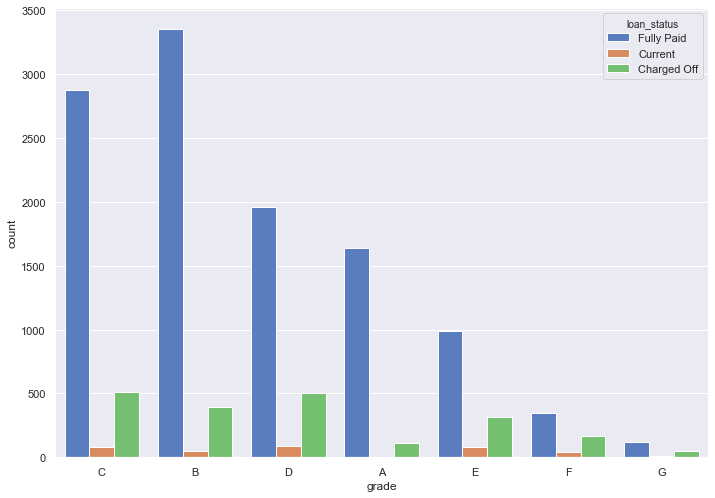

In [80]:
sns.countplot(x='grade',hue="loan_status", data=loan,palette="muted")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()


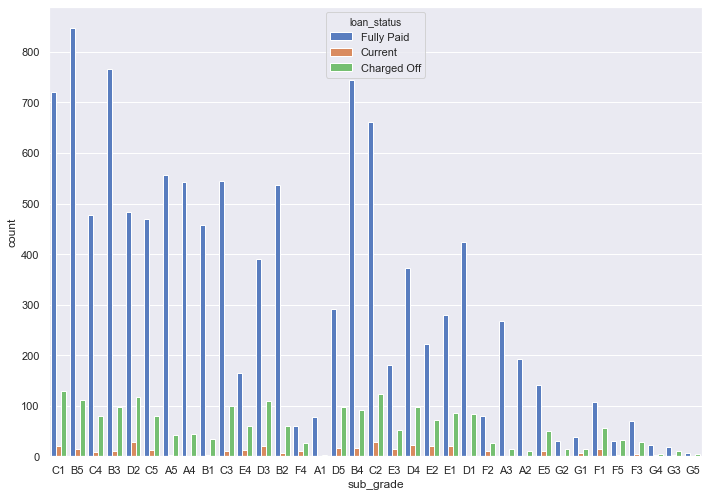

In [81]:
sns.countplot(x='sub_grade',hue="loan_status", data=loan,palette="muted")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

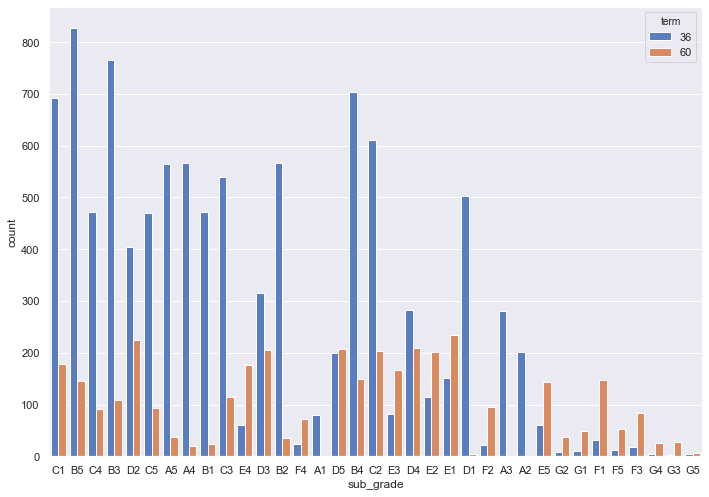

In [82]:
sns.countplot(x='sub_grade',hue="term", data=loan,palette="muted")
sns.set(rc={'figure.figsize':(11.0,8.2)})
plt.show()

In [83]:
loan.groupby('grade')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,1754.0,7540.692702,4544.241539,500.0,4500.0,6500.0,10000.0,35000.0
B,3796.0,9233.515543,6194.951440,500.0,4800.0,8000.0,12000.0,35000.0
C,3463.0,9454.822408,6075.623153,500.0,5000.0,8000.0,12375.0,35000.0
D,2555.0,11449.716243,6996.147430,1000.0,6000.0,10000.0,15000.0,35000.0
E,1389.0,15107.847372,8661.591115,1000.0,8000.0,14000.0,20000.0,35000.0
F,559.0,18869.364937,8870.562245,1400.0,12000.0,18800.0,25000.0,35000.0
G,174.0,20855.747126,8088.233802,1600.0,16000.0,21375.0,25000.0,35000.0


In [84]:
loan.groupby('grade')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,1754.0,0.075754,0.009329,0.0542,0.0699,0.0751,0.0800,0.0963
B,3796.0,0.110140,0.009305,0.0600,0.1037,0.1099,0.1171,0.1269
C,3463.0,0.134674,0.010173,0.0600,0.1299,0.1349,0.1399,0.1611
D,2555.0,0.155980,0.012851,0.0600,0.1484,0.1562,0.1632,0.1825
E,1389.0,0.176733,0.013989,0.0600,0.1669,0.1756,0.1879,0.2099
F,559.0,0.196728,0.015269,0.1501,0.1854,0.1941,0.2089,0.2294
G,174.0,0.213143,0.013383,0.1734,0.2016,0.2090,0.2248,0.2411


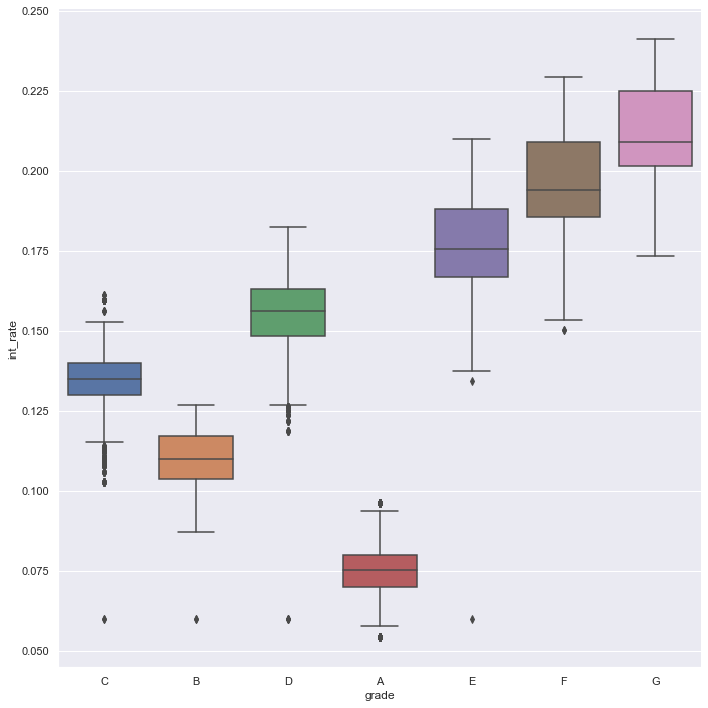

In [85]:
sns.catplot(x="grade", y="int_rate", kind="box", data=loan,height=10, aspect=1)
plt.show()


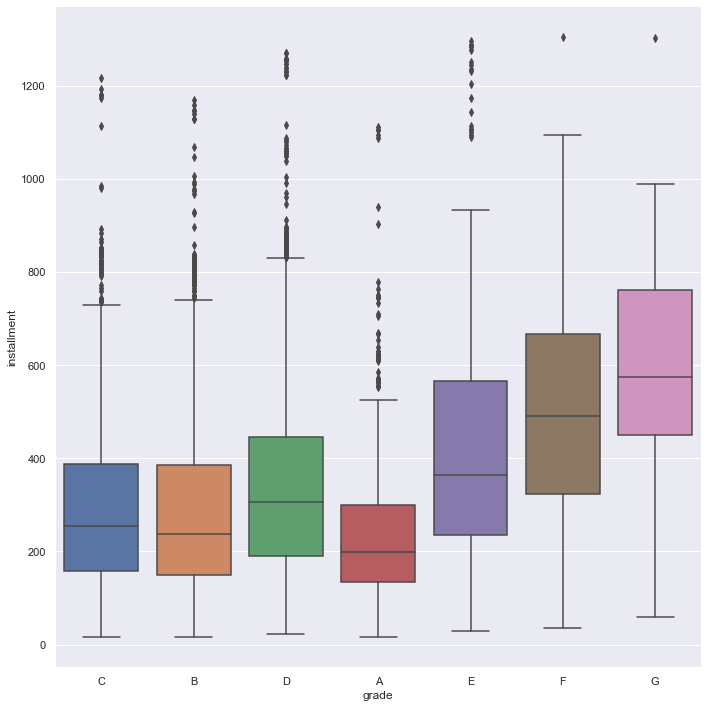

In [86]:
sns.catplot(x="grade", y="installment", kind="box", data=loan,height=10, aspect=1)
plt.show()


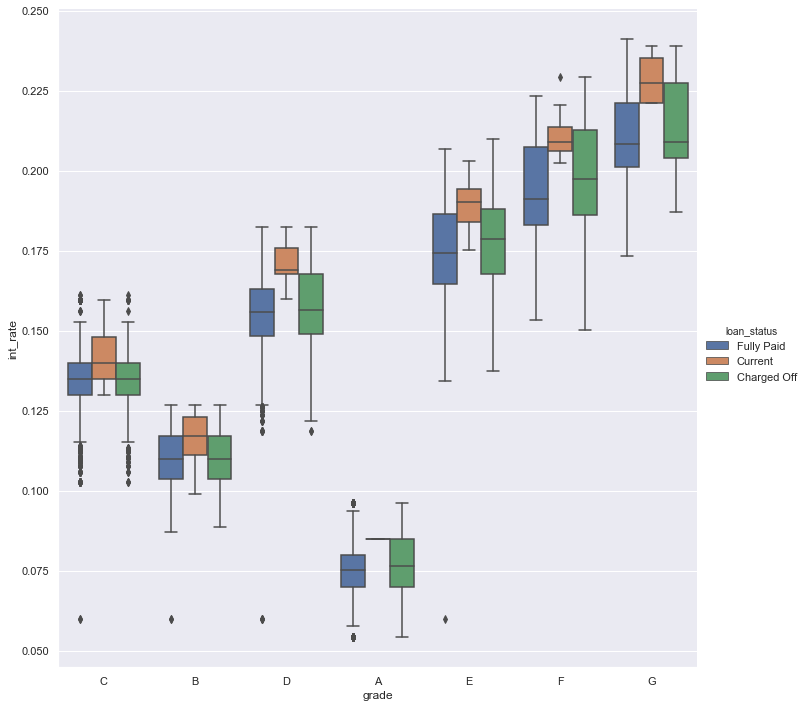

In [87]:
sns.catplot(x="grade", y="int_rate",hue="loan_status", kind="box", data=loan,height=10, aspect=1)
plt.show()

In [88]:
loan['emp_length'].unique()

array([10,  1,  4,  2,  6,  5,  3,  0,  7,  8,  9])

In [89]:
loan['emp_length'].value_counts()

10    3336
0     1513
2     1499
3     1431
4     1229
5     1128
1     1122
6      783
7      664
8      559
9      426
Name: emp_length, dtype: int64

In [90]:
loan['emp_length'].describe()

count    13690.000000
mean         5.111833
std          3.572770
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [91]:
loanChargedOff=loan[loan['loan_status']=='Charged Off']

In [92]:
loanPaid=loan[loan['loan_status']=='Fully Paid']

In [93]:
loanPaid['emp_length'].value_counts()

10    2663
2     1264
0     1251
3     1192
4     1019
5      931
1      926
6      671
7      540
8      465
9      356
Name: emp_length, dtype: int64

In [94]:
loanChargedOff['emp_length'].value_counts()

10    543
0     241
3     212
2     201
1     180
4     175
5     168
7     103
6      95
8      83
9      59
Name: emp_length, dtype: int64

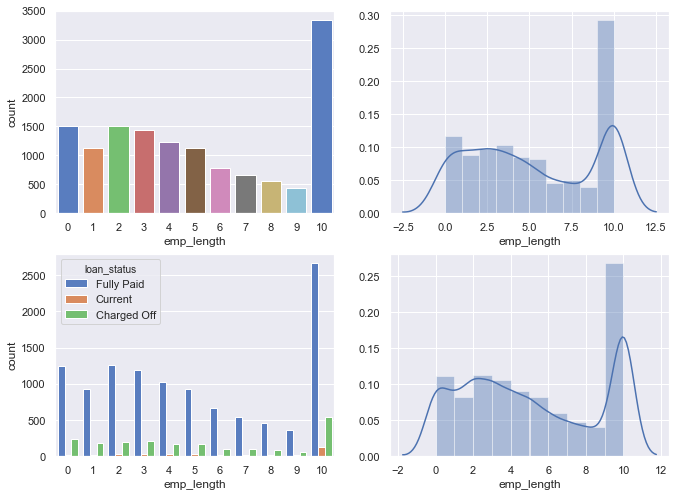

In [95]:
f, axes = plt.subplots(2, 2)
sns.countplot(x='emp_length', data=loan,palette="muted",ax=axes[0,0])
sns.distplot(loanChargedOff['emp_length'],bins=10,ax=axes[0,1])
sns.countplot(x='emp_length',hue='loan_status', data=loan,palette="muted",ax=axes[1,0])
sns.distplot(loanPaid['emp_length'],bins=10,ax=axes[1,1])
plt.show()

In [96]:
loan.groupby('emp_length')['loan_status'].value_counts(normalize=True)


emp_length  loan_status
0           Fully Paid     0.826834
            Charged Off    0.159286
            Current        0.013880
1           Fully Paid     0.825312
            Charged Off    0.160428
            Current        0.014260
2           Fully Paid     0.843229
            Charged Off    0.134089
            Current        0.022682
3           Fully Paid     0.832984
            Charged Off    0.148148
            Current        0.018868
4           Fully Paid     0.829129
            Charged Off    0.142392
            Current        0.028478
5           Fully Paid     0.825355
            Charged Off    0.148936
            Current        0.025709
6           Fully Paid     0.856960
            Charged Off    0.121328
            Current        0.021711
7           Fully Paid     0.813253
            Charged Off    0.155120
            Current        0.031627
8           Fully Paid     0.831843
            Charged Off    0.148479
            Current        0.019678
9   

In [97]:
loan['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [98]:
loan['verification_status'].value_counts()

Not Verified       6022
Verified           4202
Source Verified    3466
Name: verification_status, dtype: int64

In [99]:
loan.groupby('verification_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
verification_status,,,,,,,,
Not Verified,6022.0,8274.680339,5111.011012,500.0,4762.5,7200.0,11000.00,35000.0
Source Verified,3466.0,9576.334391,6446.993370,1000.0,5000.0,8000.0,12093.75,35000.0
Verified,4202.0,14853.129462,8381.787523,1000.0,8000.0,14000.0,20000.00,35000.0


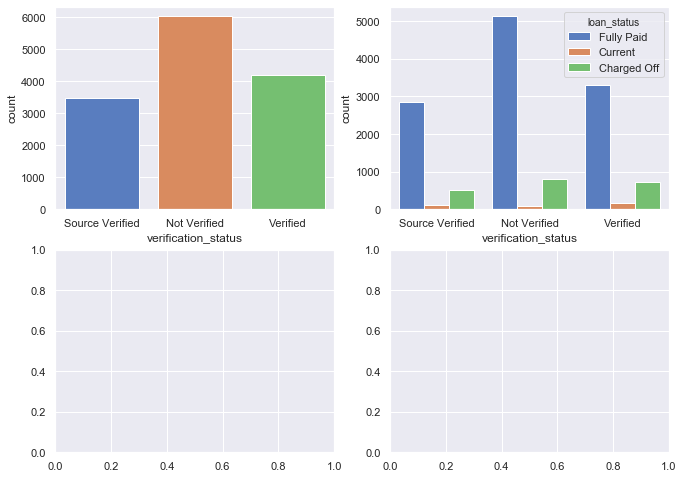

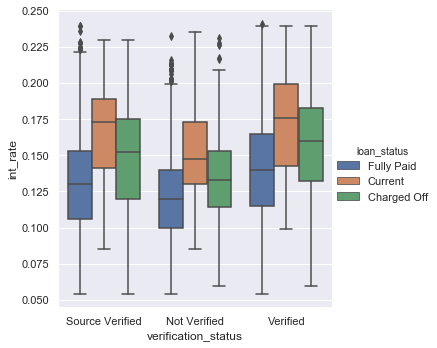

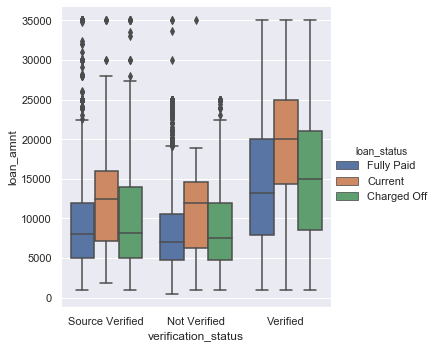

In [100]:
f, axes = plt.subplots(2, 2)
sns.countplot(x='verification_status', data=loan,palette="muted",ax=axes[0,0])
sns.countplot(x='verification_status',hue='loan_status', data=loan,palette="muted",ax=axes[0,1])
sns.catplot(x="verification_status", y="int_rate",hue="loan_status", kind="box", data=loan,ax=axes[1,0])
sns.catplot(x="verification_status", y="loan_amnt",hue="loan_status", kind="box", data=loan,ax=axes[1,1])
plt.show()

In [101]:
loan['purpose'].unique()

array(['other', 'home_improvement', 'medical', 'debt_consolidation',
       'small_business', 'credit_card', 'car', 'major_purchase', 'house',
       'vacation', 'wedding', 'moving', 'renewable_energy', 'educational'],
      dtype=object)

In [102]:
loan['purpose'].value_counts().sort_values()

renewable_energy        35
educational            127
house                  136
vacation               142
moving                 212
medical                256
wedding                358
car                    504
small_business         665
major_purchase         772
home_improvement      1133
credit_card           1505
other                 1511
debt_consolidation    6334
Name: purpose, dtype: int64

In [103]:
loan.groupby('purpose')['loan_amnt'].median().sort_values()

purpose
vacation               4000
moving                 4800
educational            5000
renewable_energy       5550
car                    5775
major_purchase         6000
other                  6000
medical                6275
wedding                8000
home_improvement       8975
credit_card            9800
debt_consolidation    10000
house                 10000
small_business        11200
Name: loan_amnt, dtype: int64

In [104]:
loan.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.094972
car                   0.095238
credit_card           0.104983
major_purchase        0.111399
home_improvement      0.117387
educational           0.118110
moving                0.136792
renewable_energy      0.142857
debt_consolidation    0.159141
house                 0.161765
vacation              0.169014
medical               0.175781
other                 0.176042
small_business        0.281203
Name: loan_status, dtype: float64

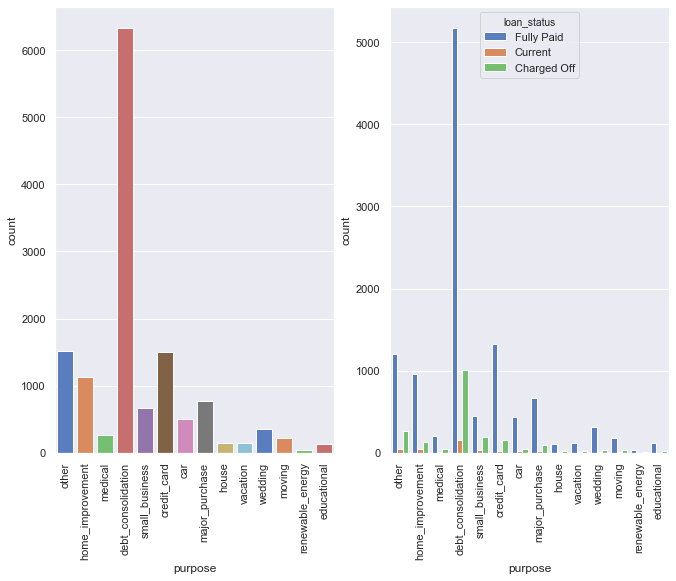

In [105]:
f, axes = plt.subplots(1, 2)
g=sns.countplot(x='purpose', data=loan,palette="muted",ax=axes[0])
g.tick_params(axis='x',rotation=90)
s=sns.countplot(x='purpose',hue='loan_status', data=loan,palette="muted",ax=axes[1])
s.tick_params(axis='x',rotation=90)
plt.show()


In [106]:
loan['dti'].describe()

count    13690.000000
mean        12.862677
std          6.482152
min          0.000000
25%          7.882500
50%         12.935000
75%         17.960000
max         29.990000
Name: dti, dtype: float64

In [107]:
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,2060.0,13.440631,6.508464,0.0,8.560,13.64,18.6050,28.58
Current,352.0,13.673324,6.642116,0.0,8.785,13.52,18.8800,29.95
Fully Paid,11278.0,12.731809,6.465240,0.0,7.760,12.78,17.7875,29.99


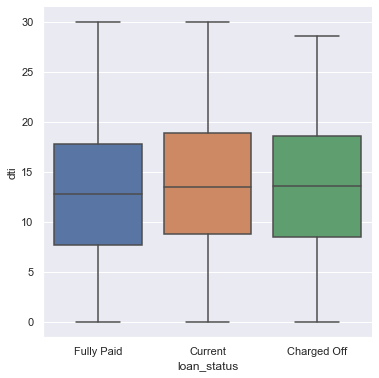

In [108]:
dti = sns.catplot(x="loan_status", y="dti", kind="box",data=loan,height=10, aspect=1)
dti.fig.set_size_inches(5,5)
plt.show()
